**Задача 8**. *Применение критерия $\chi^2$ Пирсона к проверке гипотезы о виде функции распределения*

Задание:
1) Используя группированную выборку из задачи №1 проверьте на уровне доверия $1-\alpha$ гипотезу $H_0$: выборка взята из генеральной совокупности, распределенной по закону $F(x)$

2) Неизвестные параметры распределения $F(x)$, если это необходимо, найдите методом максимального правдоподобия (или методом моментов) по выборке

3) Постройте совмещенные графики гистограммы относительных частот и плотности, соответсвующей функции распределения $F(x)$

Вариант 8

Закон распределения: Показательный $E(\lambda)$

$\alpha$: 0.05

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from math import log2, trunc

In [2]:
data = pd.read_csv('var8.csv', sep=' ', header=None)
data

,0,1,2,3,4,5,6,7,8,9
0,0.415,0.420,0.120,0.506,1.074,0.532,0.016,0.025,0.434000,0.387
1,0.448,0.263,0.069,1.107,1.052,0.246,0.443,0.234,0.064000,0.387
2,0.097,0.478,0.135,0.066,1.259,0.381,0.011,0.128,0.004673,0.088
3,0.142,1.029,0.204,0.279,0.107,0.187,0.056,0.560,0.512000,0.070
4,0.024,0.215,0.253,2.073,0.119,0.215,0.056,0.512,0.407000,0.550
5,0.085,0.043,0.055,0.595,0.565,0.128,0.171,0.065,0.391000,0.052
6,0.313,0.108,0.041,0.065,0.201,0.255,0.122,0.500,0.735000,0.036
7,0.228,0.380,0.255,0.117,0.319,0.086,0.362,0.328,0.330000,0.075
8,0.604,0.207,0.202,0.127,0.060,0.127,0.262,0.119,0.066000,0.464
9,0.025,0.323,0.137,0.831,0.460,0.606,0.054,0.417,0.101000,0.284


Произведу первоначальную предобработку данных

In [3]:
X = np.reshape(np.array(data), (data.shape[0]*data.shape[1]))
l = 1 + trunc(log2(X.shape[0]))
h = (X.max() - X.min()) / l

print('Объем выборки:', X.shape[0])
print('Минимальный элемент:', round(X.min(), 3))
print('Максимальный элемент:', round(X.max(), 3))
print('Размах:', round(X.max() - X.min(), 3))
print('Количество интервалов (l):', l)
print('Длина интервала (h):', round(h, 4))

Объем выборки: 120
Минимальный элемент: 0.005
Максимальный элемент: 2.073
Размах: 2.068
Количество интервалов (l): 7
Длина интервала (h): 0.2955


In [4]:
x = np.linspace(X.min(), X.max(), l + 1)
hist = np.histogram(X, bins=x)

print('Массив эмпирических частот:\n', hist[0])
p = hist[0] / X.shape[0]
print('Массив относительных частот:\n', p.round(3))
f1 = p / h
print('Высоты столбцов гистограммы:\n', [round(i, 3) for i in f1])
print('Интервалы столбцов гистограммы:\n', hist[1].round(3))

Массив эмпирических частот:
 [69 33  6  9  2  0  1]
Массив относительных частот:
 [0.575 0.275 0.05  0.075 0.017 0.    0.008]
Высоты столбцов гистограммы:
 [1.946, 0.931, 0.169, 0.254, 0.056, 0.0, 0.028]
Интервалы столбцов гистограммы:
 [0.005 0.3   0.596 0.891 1.187 1.482 1.778 2.073]


Методом максимального правдоподобия найду оценку неизвестного параметра $\lambda$ показательного закона:
$$L(\lambda) = \prod\limits_{i = 1}^n f(x_i, \lambda) = \prod\limits_{i = 1}^n \lambda e^{-\lambda x_i} = \lambda^n e^{-\lambda  \sum\limits_{i = 1}^n x_i}$$
$$ln L(\lambda) = ln \lambda^n e^{-\lambda  \sum\limits_{i = 1}^n x_i} = n\cdot ln\lambda -\lambda \sum\limits_{i = 1}^n x_i$$
$$\frac{dln L}{d\lambda} = n\frac{1}{\lambda} - \sum\limits_{i = 1}^n x_i = 0$$
$$\lambda = \frac{n}{\sum\limits_{i = 1}^n x_i} = \frac{1}{\overline{X_в}}$$

In [5]:
print('Выборочное среднее:', round(X.mean(), 3))
lambda_ = 1 / X.mean()
print('Оценка параметра:', round(lambda_, 3))

Выборочное среднее: 0.34
Оценка параметра: 2.937


Построю совмещенные графики

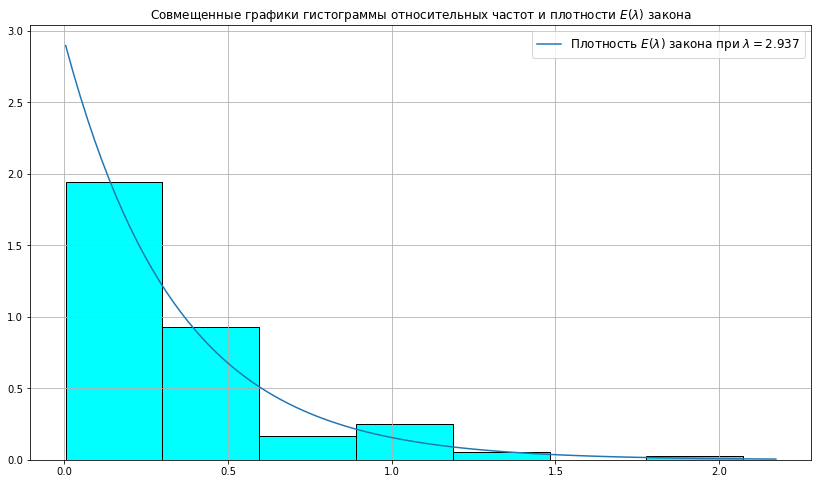

In [6]:
plt.figure(figsize=(14, 8))
# строю гистограмму
plt.bar(hist[1][:-1], f1, width=h, color='cyan', edgecolor='black', align='edge')

# строю плотность распределения
x = np.linspace(X.min(), X.max() + 0.1, 100)
y = stats.expon.pdf(x, scale=1/lambda_)
plt.plot(x, y, label=r'Плотность $E(\lambda)$ закона при $\lambda=2.937$')

plt.legend(fontsize=12)
plt.title(r'Совмещенные графики гистограммы относительных частот и плотности $E(\lambda)$ закона')
plt.grid()

plt.show()

Вычисление статистики $\chi_в^2$

In [7]:
def get_pj(l, intervals):
    pj = np.zeros((l,))
    
    pj[0] = stats.expon.cdf(intervals[1], scale=1/lambda_)
    for i in range(1, l - 1):
        pj[i] = stats.expon.cdf(intervals[i + 1], scale=1/lambda_) - stats.expon.cdf(intervals[i], scale=1/lambda_)
    pj[l - 1] = stats.expon.cdf(1000, scale=1/lambda_) - stats.expon.cdf(intervals[l - 1], scale=1/lambda_)
    
    return pj

pj = get_pj(l, hist[1])
npj = pj * X.shape[0]

print('Массив pj:\n', np.round(pj, 3))
print('Массив n*pj:\n', np.round(npj, 3))

print('\nПроверка sum(pj) =', np.round(pj.sum(), 0))
print('Проверка sum(npj) =', np.round(npj.sum(), 0))

Массив pj:
 [0.586 0.24  0.101 0.042 0.018 0.007 0.005]
Массив n*pj:
 [70.308 28.83  12.104  5.081  2.133  0.896  0.648]

Проверка sum(pj) = 1.0
Проверка sum(npj) = 120.0


Проверка на адекватность пройдена. Осталось вычислить сам критерий.

Как видно по последним значениям массива npj: только сумма последних четырех элементов >= 5 => объединим их в один интервал

In [8]:
def union_intervals(cum, npj, k):
    u_cum = np.zeros((cum.shape[0] - k + 1,))
    u_npj = np.zeros((npj.shape[0] - k + 1,))
    
    for i in range(u_cum.shape[0] - 1):
        u_cum[i] = cum[i]
        u_npj[i] = npj[i]
        
    u_cum[-1] = cum[-k:cum.shape[0]].sum()
    u_npj[-1] = npj[-k:npj.shape[0]].sum()
    
    return u_cum, u_npj

u_cum, u_npj = union_intervals(hist[0], npj, 4)

print('Объединенные эмпирические частоты:\n', np.round(u_cum, 3))
print('Объединенные теоретические частоты:\n', np.round(u_npj, 3))

Объединенные эмпирические частоты:
 [69. 33.  6. 12.]
Объединенные теоретические частоты:
 [70.308 28.83  12.104  8.758]


In [9]:
chi2_sampling = 0.0
for i in range(u_cum.shape[0]):
    chi2_sampling += (u_npj[i] - u_cum[i]) ** 2 / u_npj[i]

print('Значение выборочного критерия хи-квадрат:', round(chi2_sampling, 3))

Значение выборочного критерия хи-квадрат: 4.905


Вычислю квантиль с уровнем доверия $1-\alpha=0.95$ и числом степеней свободы $m=(l-1) - 1 - 3$ (1 от оценки параметра, 3 от объединения 4 интервалов)

In [10]:
alpha = 0.05
m = (l-1) - 1 - 3
chi2 = stats.chi2.ppf(1-alpha, m)
print('Значения квантиля хи-квадрат на уровне доверия 0.95 с {} степенями свободы равно {}'.format(m, round(chi2, 3)))

Значения квантиля хи-квадрат на уровне доверия 0.95 с 2 степенями свободы равно 5.991


$\chi_в^2=4.905<\chi_{0.95}^2(2)=5.991$. Значит можно сформулировать следующий **вывод**: гипотеза $H_0$: выборка взята из генеральной совокупности, распределенной по закону $E(\lambda)$ принимается на уровне доверия 0.95